In [1]:
import xgboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.special import softmax

In [2]:
X = pd.read_csv("lt_X_500.csv")
X = X.rename(columns={"Unnamed: 0": "CellID"})
cellID = X['CellID']
X = X.drop(columns=['CellID'])
X.columns = X.columns.str.replace(".", "_")

/home/joeleliason/anaconda3/envs/bioinfo/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [3]:
y = pd.read_csv("lt_y.csv")
y = y.drop(columns = ["Unnamed: 0"])
y = y.rename(columns = {"x": "class"})['class']

In [4]:
# params = {"max_depth":6, "eta":0.05, "objective" : "multi:softmax", "num_class" : 6}

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.2, random_state=42)

In [4]:
m = xgboost.XGBClassifier(n_estimators = 500,
                 max_depth = 4,
                 learning_rate = 0.05,
                 verbosity = 1,
                 objective = "multi:softmax")
# train = xgb.DMatrix(trainX, label=trainY)
# val = xgb.DMatrix(valX, label=valY)

# watchlist = list(train=train,eval=val)
          
m.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mlogloss',
        early_stopping_rounds = 5,
        verbose=True)

# m = RandomForestClassifier()

# m.fit(X_train, y_train)



# m = xgb.train(params, train, nrounds = 500, early_stopping_rounds = 5, watchlist=watchlist)

/home/joeleliason/anaconda3/envs/bioinfo/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.67384	validation_1-mlogloss:1.68151
[1]	validation_0-mlogloss:1.57099	validation_1-mlogloss:1.58668
[2]	validation_0-mlogloss:1.47827	validation_1-mlogloss:1.50072
[3]	validation_0-mlogloss:1.39608	validation_1-mlogloss:1.42497
[4]	validation_0-mlogloss:1.32091	validation_1-mlogloss:1.35549
[5]	validation_0-mlogloss:1.25158	validation_1-mlogloss:1.29102
[6]	validation_0-mlogloss:1.18849	validation_1-mlogloss:1.23331
[7]	validation_0-mlogloss:1.13035	validation_1-mlogloss:1.18100
[8]	validation_0-mlogloss:1.07571	validation_1-mlogloss:1.12999
[9]	validation_0-mlogloss:1.02645	validation_1-mlogloss:1.08555
[10]	validation_0-mlogloss:0.97954	validation_1-mlogloss:1.04197
[11]	validation_0-mlogloss:0.93543	validation_1-mlogloss:1.00079
[12]	validation_0-mlogloss:0.89481	validation_1-mlogloss:0.96384
[13]	validation_0-mlogloss:0.85649	validation_1-mlogloss:0.92922
[14]	validation_0-mlogloss:0.82036	validation_1-mlogloss:0.89630
[15]	validation_0-mlogloss:0.78628	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [5]:
import pickle
# pickle.dump(m, open('lt_model_500.model','wb'))
m = pickle.load(open('lt_model_500.model','rb'))

In [14]:
# ExplainerDashboard(explainer, shap_interaction = False, no_permutations = True, mode = 'jupyterlab', plot_sample=1000).run()

Building ExplainerDashboard..
**kwargs: Passing the following keyword arguments to all the dashboard ExplainerComponents: no_permutations=True, plot_sample=1000...
Generating layout...
Calculating shap values...
Generating model dump...
Calculating dependencies...
Calculating pred_percentiles...
Calculating prediction probabilities...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


In [15]:
# ExplainerDashboard.terminate(8050)

Trying to shut down dashboard on port 8050...


In [6]:
import shap
explainer = shap.Explainer(m)

In [6]:
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [28]:
# explainer.shap_interaction_values(X_test[1:10])

In [139]:
X_test[1:10]

,Sftpc,CT010467_1,Sftpa1,Lyz2,AY036118,mt-Rnr2,Clu,Gm10800,Trf,Sftpb,...,Aup1,Gosr2,Cpt1a,Bckdha,Mkrn2,Eva1a,Mxd4,Prmt5,Pja2,Aldh18a1
2321,14620.0,116302.0,1815.5,0.0,18192.0,10225.0,186.5,3937.0,211.0,2677.5,...,6.0,1.0,0.0,185.0,363.0,0.0,0.0,0.0,3.0,0.0
3619,18438.5,103760.5,2081.0,197.0,5614.5,26480.5,1739.0,979.5,5568.5,1700.0,...,94.5,32.5,20.0,22.0,12.0,32.5,42.0,70.0,44.5,11.0
1187,75133.5,53387.5,16731.5,43777.5,8656.0,5364.0,47.5,11.0,305.5,6581.5,...,37.0,193.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
315,11507.0,83431.5,1061.0,57.0,12350.5,21678.5,11839.0,33.5,17.0,2670.0,...,82.0,58.5,44.0,46.0,16.0,28.5,51.5,6.0,0.0,18.0
1720,19198.0,60161.0,7116.0,0.0,7315.5,23250.0,780.0,764.0,1628.0,2346.0,...,37.0,0.0,122.0,83.0,36.0,0.0,34.0,36.0,0.0,26.5
351,43856.0,33900.5,12578.5,17853.5,3874.5,17957.0,102.0,2569.5,172.0,6314.5,...,3.0,0.0,0.0,14.0,0.0,124.5,0.0,0.0,0.0,0.0
149,43007.0,91284.5,14894.0,12009.0,9795.0,16908.0,343.5,990.5,622.5,3540.0,...,112.5,83.0,88.5,0.0,0.0,0.0,120.0,0.0,0.0,0.0
2287,43390.5,79372.0,18471.0,3455.5,1394.5,19493.5,1277.0,404.0,2260.5,2136.5,...,83.0,0.0,76.0,40.5,0.0,58.0,0.0,41.0,48.5,38.0
457,52205.5,84181.5,203.5,939.0,6948.5,13081.5,161.5,955.5,137.0,1627.5,...,191.5,41.0,0.0,0.0,0.0,0.0,166.5,0.0,0.0,0.0


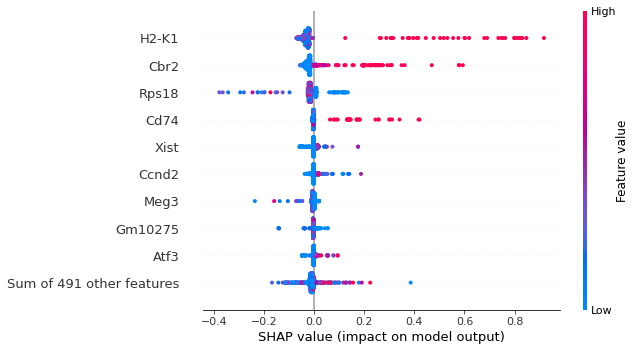

In [20]:
shap.plots.beeswarm(shap_values[:,:,0])

Beeswarm plot showing different results every time it is called (when using RF classifier)

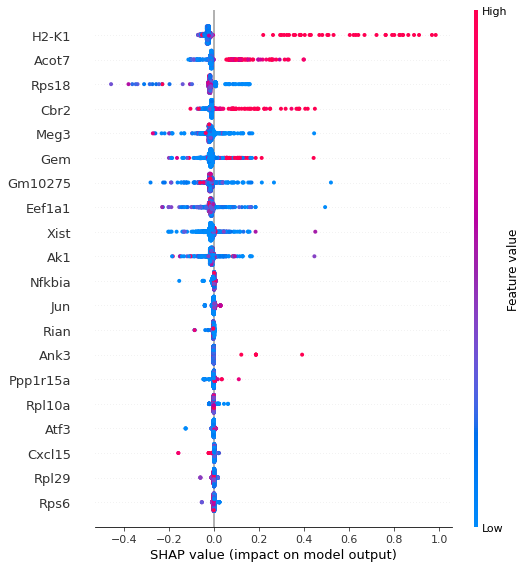

In [146]:
# 20 features is default
shap.summary_plot(shap_values[:,:,0], X_test)

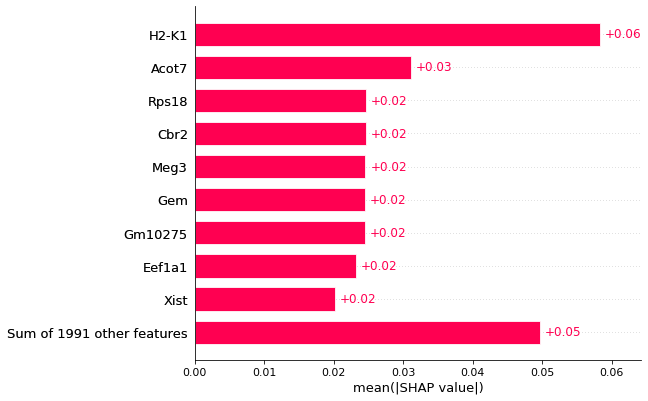

In [147]:
# Global bar plot
shap.plots.bar(shap_values[:,:,0])

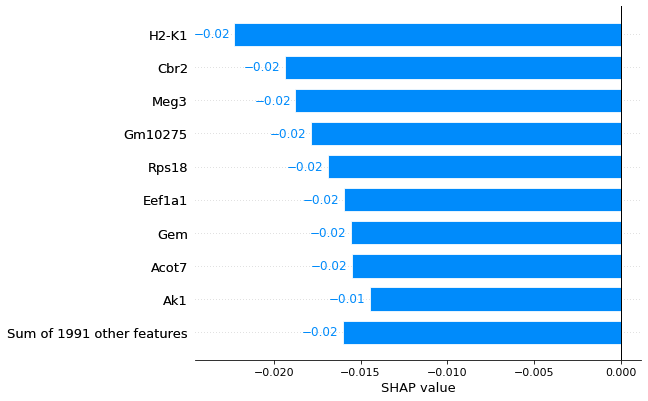

In [148]:
# Local bar plot
shap.plots.bar(shap_values[80,:,0])

Can also do a cohort shap bar plot (view importances for each feature by cohort). Can also use a DecisionTreeRegressor to find an optimal splitting for $N$ cohorts:

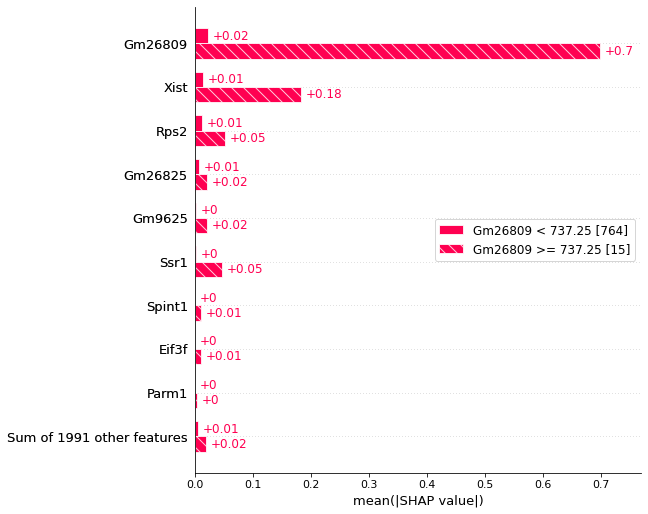

In [87]:
shap.plots.bar(shap_values[:,:,3].cohorts(2).abs.mean(0))

This is pretty interesting - for class 4, how the separation in class 4 is largely driven by Gm26809

In [7]:
shap_list = [shap_values[:,:,i] for i in range(6)]
feat_names = X_test.columns.tolist()

In [9]:
shap.multioutput_decision_plot(explainer.expected_value, [shap_values[1,:,i] for i in range(6)], row_index = 2, feature_names = X_test.columns.tolist())

KeyboardInterrupt: 

In [ ]:
# Can succesfully compute SHAP interaction values for top-500 feature data set
interaction_values = explainer.shap_interaction_values(X_test)

In [7]:
interaction_values[0].shape

(779, 500, 500)

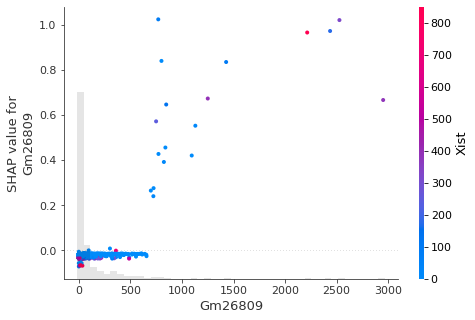

In [12]:
shap.plots.scatter(shap_values[:,"Gm26809",3], color = shap_values[:,:,3])

* Are there gene sets that predict time point?
* What is the dynamic change in mechanisms over time? How do all of the cells change?
* How do clusters or subgroups of the cells change (mechanistically) over time?
* Do SHAP values or other feature importance metrics give us anything more than typical gene enrichment analysis?
* Do gene interactions matter? How can we extract these from the SHAP values? How do gene interactions inform our understanding of changes in dynamics? We can look at changes in expressed genes and gene sets, as well as changes in gene interactions, over time 
* Look at top genes for dynamic changes (genes that increase/decrease in SHAP value over time), and observe how all of their first-order interactions change over time. Look also at top biological processes (as given by an enrichment analysis; GO) and observe how they change over time.
* Do we get anything beyond what a more typical analysis would give us? (This might be the hard part; may need to reach out to a cancer biologist)
* The point of IML is to dissect complex nonlinear interactions between features. What is the best way of doing this wrt gene expression analysis? (Groupwise SHAP, for example)

Question 1: How do top SHAP valued genes differ from a particular gene enrichment analysis? This should be simple enough to take a look

Question 2: How do top gene programs (as defined by top SHAP valued genes) differ from GO from a typical GSEA?

Question 3: We can get first-order interactions of genes out of SHAP values. How can these be used to further inform our understanding of the top gene programs/mechanisms? How do they change in between gene programs? How do they change in between classes?

In [34]:
import pickle
pickle.dump((shap_values, interaction_values), open('shap_vals_500.pkl', 'wb'))

In [7]:
np.save("shap_values_500.npy",shap_values.values)

In [8]:
np.save("base_values_500.npy", shap_values.base_values)

In [14]:
np.save("interaction_values_500.npy", np.array(interaction_values))

In [7]:
interaction_values = np.load("interaction_values_500.npy")

In [8]:
interaction_values.shape

(6, 779, 500, 500)

In [9]:
mean_interaction_PerClass = interaction_values.mean(axis=1)

In [11]:
np.save("mean_interaction_perclass_500.npy", mean_interaction_PerClass)

In [10]:
mean_interaction_PerClass.shape

(6, 500, 500)

In [19]:
interaction_1Class = np.array([interaction_values[y_ix,i,:,:] for i,y_ix in enumerate(y_test)])

In [20]:
interaction_1Class.shape

(779, 500, 500)

In [21]:
np.save("interaction_y_class_500.npy", interaction_1Class)